In [2]:
import astropy
import matplotlib
import numpy as np

from astropy.io import fits
from astropy.wcs import WCS

import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (12, 9)

In [4]:
GASKAP_file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits')

All HI4PI files have the same header/channel width/etc

In [41]:
HI4PI_file_TL = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/SMC_HI4PI/CAR_B02.fits') # top left
HI4PI_file_TL.info()
HI4PI_file_TL[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research/Data/SMC_HI4PI/CAR_B02.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (266, 266, 933)   float32   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  266                                                  
NAXIS2  =                  266                                                  
NAXIS3  =                  933                                                  
OBJECT  = 'HI4PI   '           / The HI 4-PI Survey                             
TELESCOP= 'Effelsberg 100m RT; ATNF Parkes 64-m' / Telescope names              
ORIGIN  = 'AIfA/MPIfR Bonn; ATNF Sydney' / Organisations or Institutions        
REFERENC= 'HI4PI Collaboration 2016' / A&A                                      
RESTFRQ =        1420405751.77                                                  
RESTWAV =       0.211061140541                                                  
WCSAXES =                   

In [13]:
HI4PI_file_TR = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/SMC_HI4PI/CAR_B01.fits') # top right

In [14]:
HI4PI_file_BL = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/SMC_HI4PI/CAR_A02.fits') # bottom left

In [15]:
HI4PI_file_BR = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/SMC_HI4PI/CAR_A01.fits') # bottom right

# RELEVANT FUNCTIONS

In [5]:
def v_indx_GASKAP(v_val): # v_val must be in m/s
    return int((v_val - 3.99321598442 * 10 ** 4) / (-9.77198303456 * 10 ** 2))

In [6]:
def v_indx_HI4PI(v_val): # v_val must be in m/s
    return int((v_val + 6 * 10 ** 5) / (1288.21496912415))

In [7]:
# mosaics HI4PI channel maps together, with GASKAP-HI plot on top

def chan_map(v_indx_GASKAP, v_indx_HI4PI, v, vmin_HI4PI_top, vmax_HI4PI_top, vmin_HI4PI_bot = 0, vmax_HI4PI_bot = 20, vmin_GASKAP = 0, vmax_GASKAP = 20):
    # GASKAP-HI plot
    wcs_GASKAP = WCS(GASKAP_file[0].header) # assigning world coordinate system (for the grid lines) 
    ax = plt.subplot(projection = wcs_GASKAP, slices=('x', 'y', v_indx_GASKAP))
    im = plt.imshow(GASKAP_file[0].data[v_indx_GASKAP,:,:], cmap = 'magma', vmin = vmin_GASKAP, vmax = vmax_GASKAP)
    plt.colorbar(im)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white')
    plt.xlabel('Right Ascension', fontsize = 20)
    plt.ylabel('Declination', fontsize = 20)
    ax.set_title('Velocity = ' + str(v) + ' km/s', fontsize = 40)
    
    # HI4PI plot
    fig, ax = plt.subplots(2, 2, figsize = (20, 20), constrained_layout = True, sharex = True, sharey = True)
    HI4PI = [[HI4PI_file_TL, HI4PI_file_TR], [HI4PI_file_BL, HI4PI_file_BR]]
    for i in range(2):
        for j in range(2):
            if i == 0:
                ax_temp = ax[i,j].imshow(np.flip(HI4PI[i][j][0].data[v_indx_HI4PI,:,:], axis = 0), cmap = 'magma', vmin = vmin_HI4PI_top, vmax = vmax_HI4PI_top)
            else:
                ax_temp = ax[i,j].imshow(np.flip(HI4PI[i][j][0].data[v_indx_HI4PI,:,:], axis = 0), cmap = 'magma', vmin = vmin_HI4PI_bot, vmax = vmax_HI4PI_bot)
                
            if j == 1:
                plt.colorbar(ax_temp, ax = ax[i,j])
                

# WHOLE CUBES (NOT MOSAICKED)

GASKAP seems to be located in the top right of the 3rd quadrant of HI4PI!

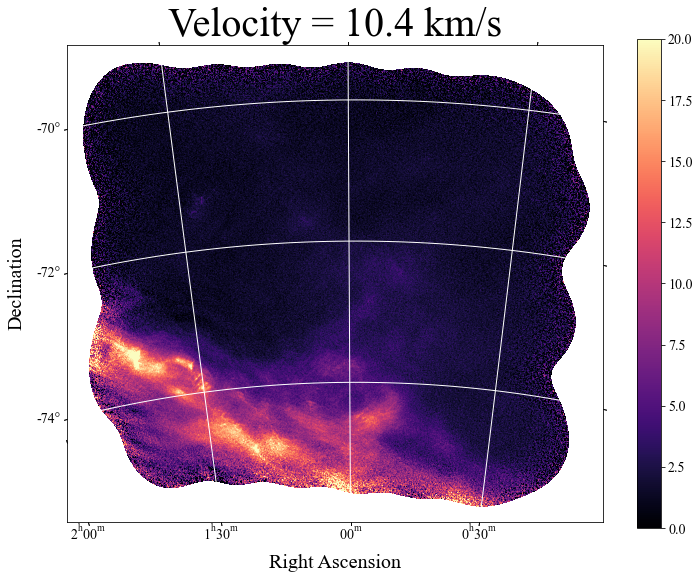

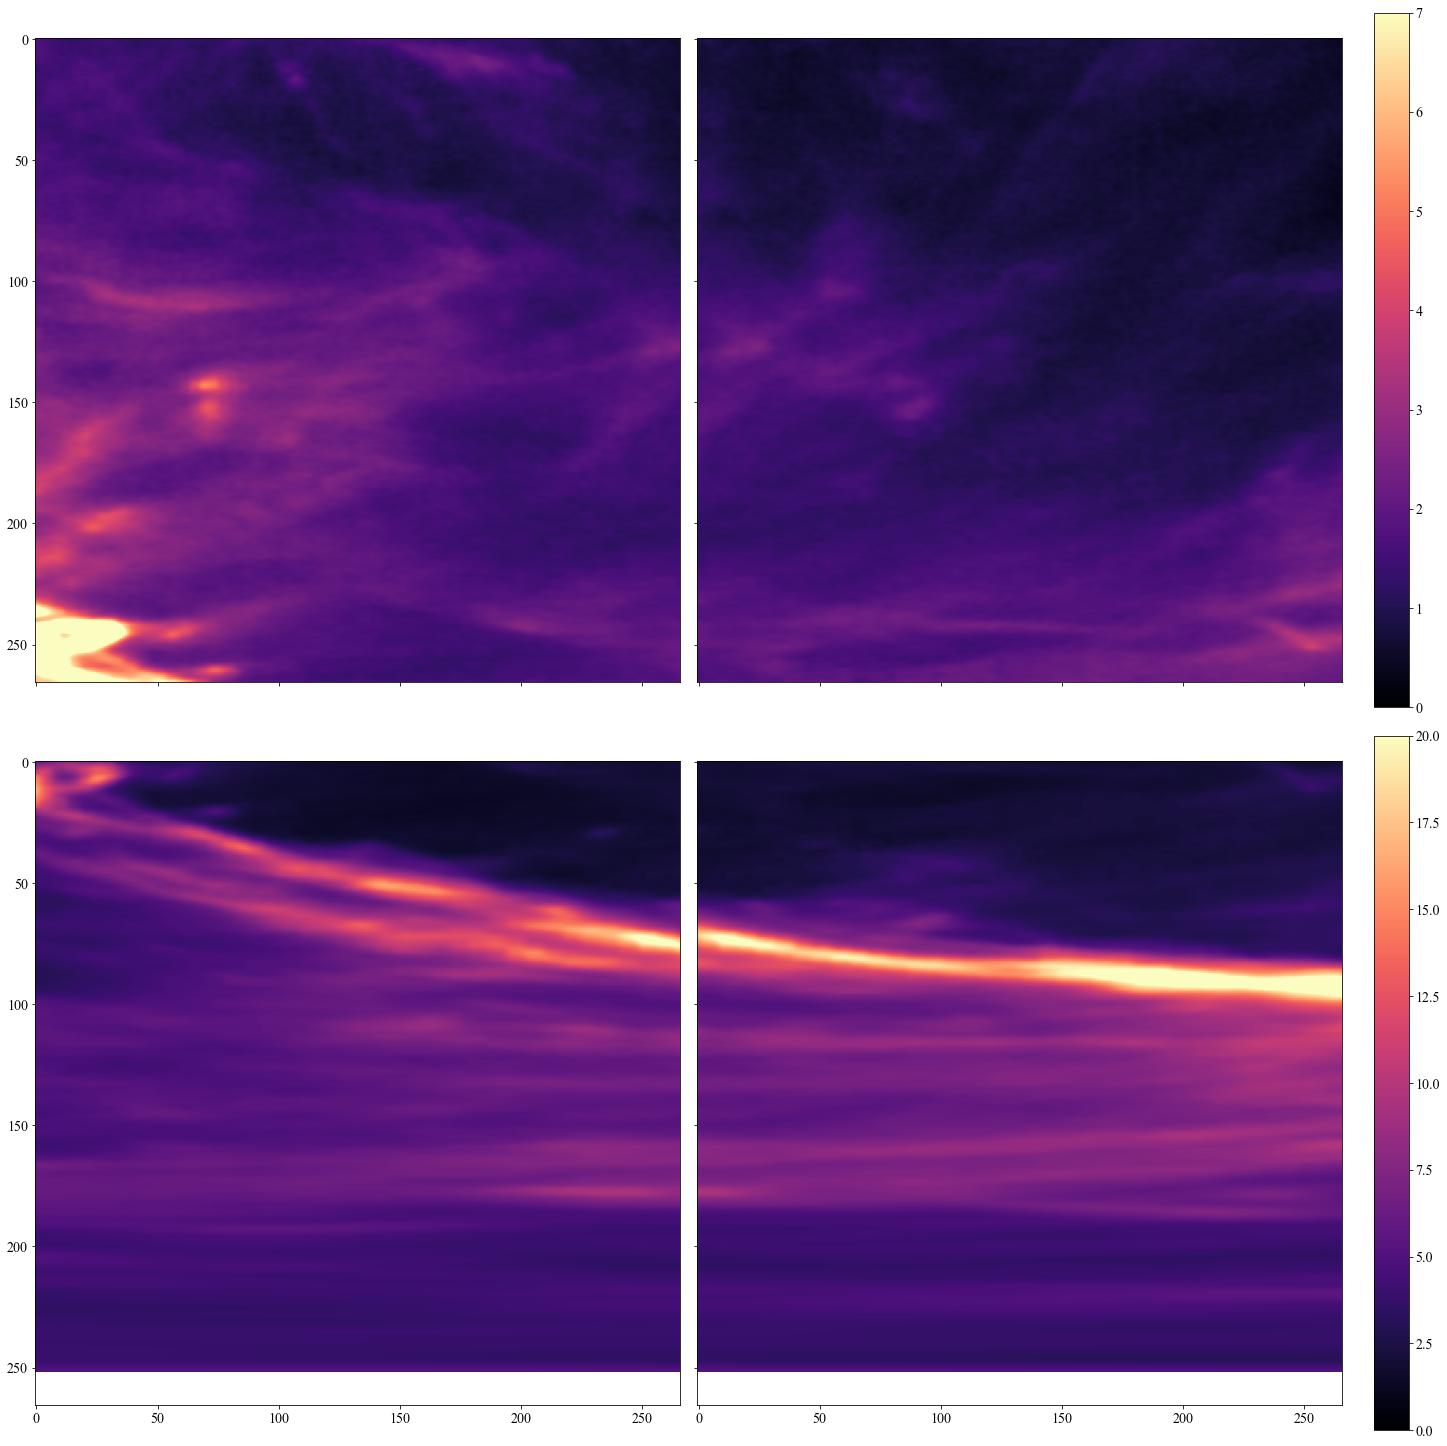

In [130]:
chan_map(v_indx_GASKAP(1.04 * 10 ** 4), v_indx_HI4PI(1.04 * 10 ** 4), 10.4, 0, 7)

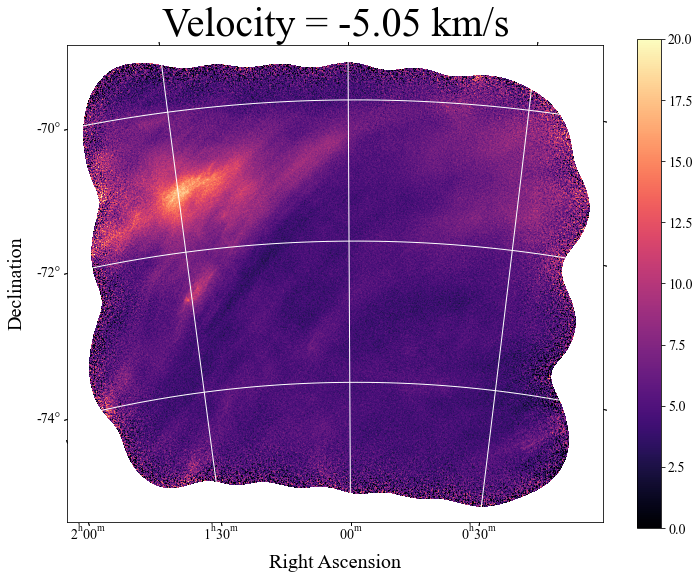

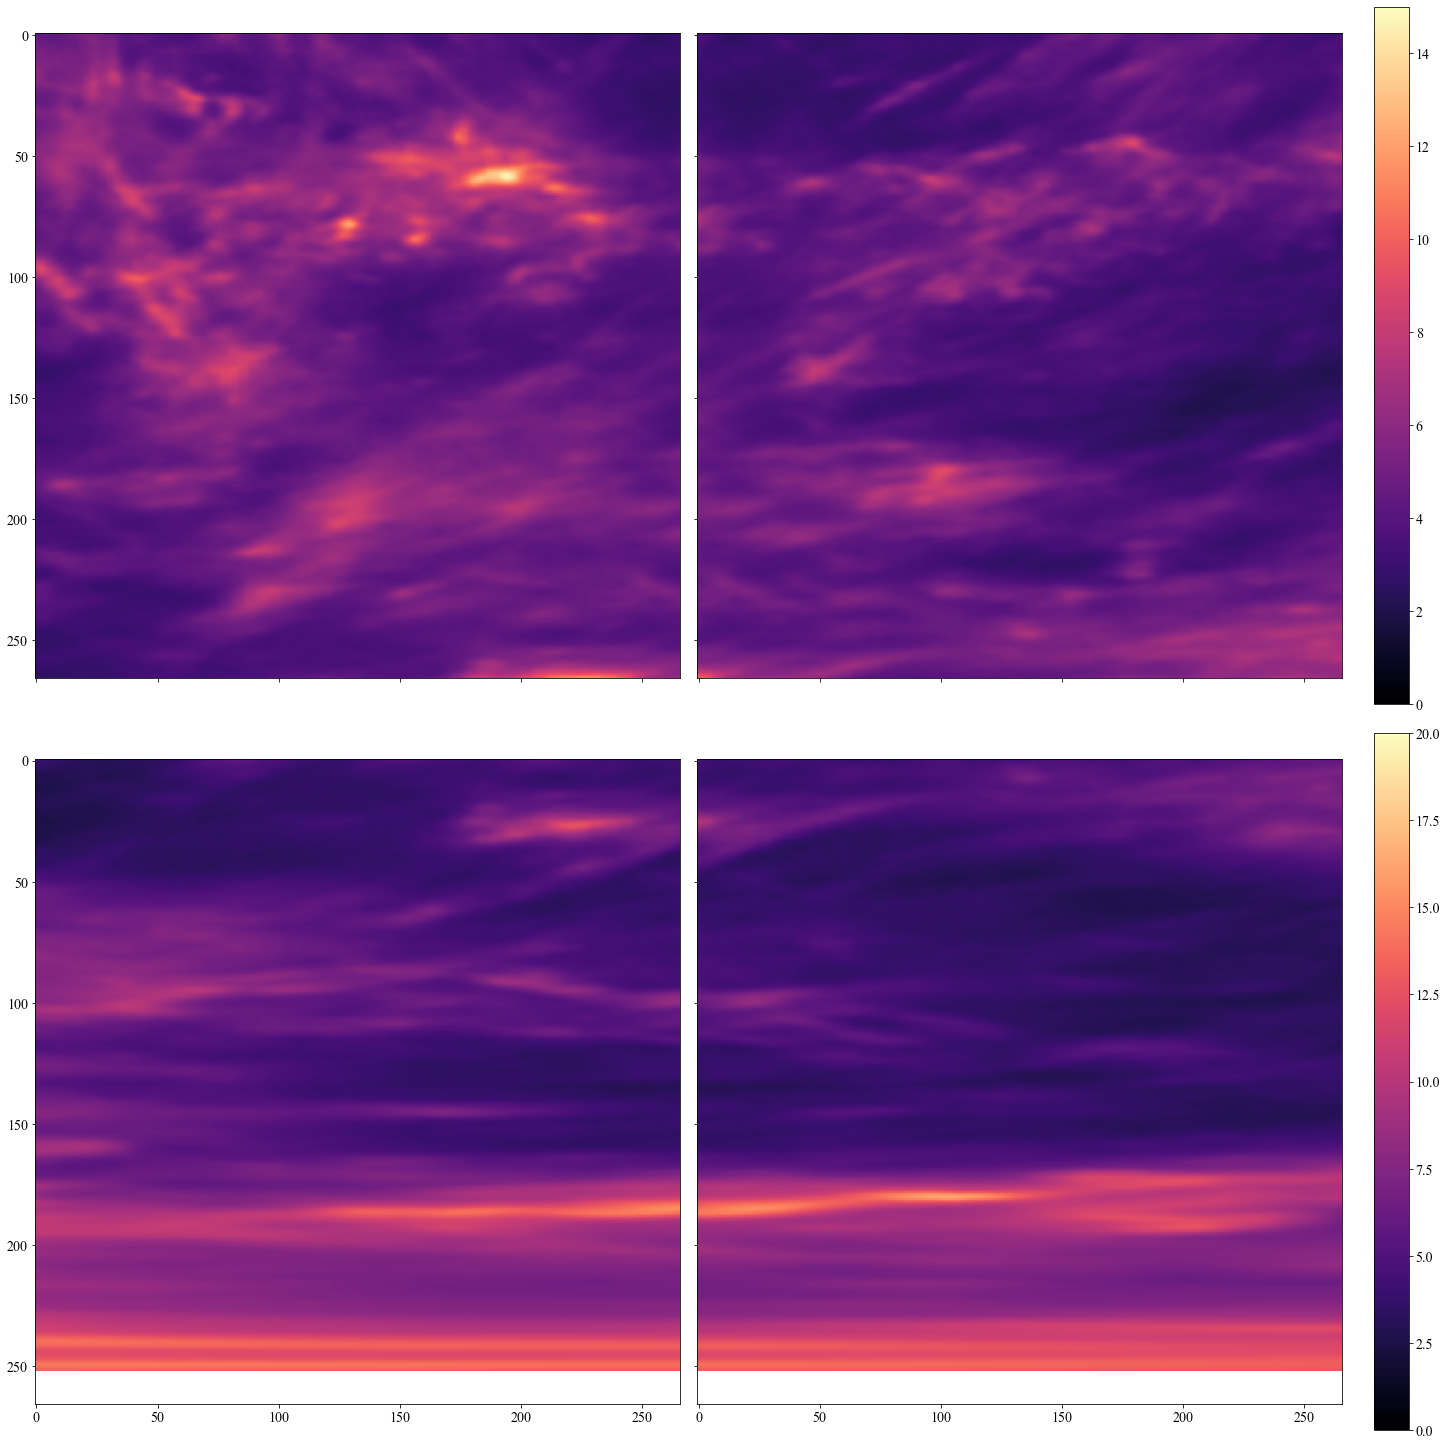

In [133]:
chan_map(v_indx_GASKAP(-5.05 * 10 ** 3), v_indx_HI4PI(-5.05 * 10 ** 3), -5.05, 0, 15)

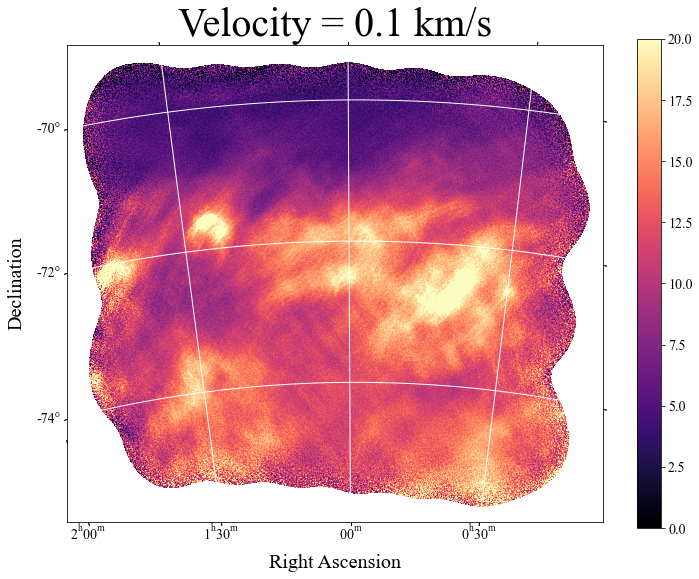

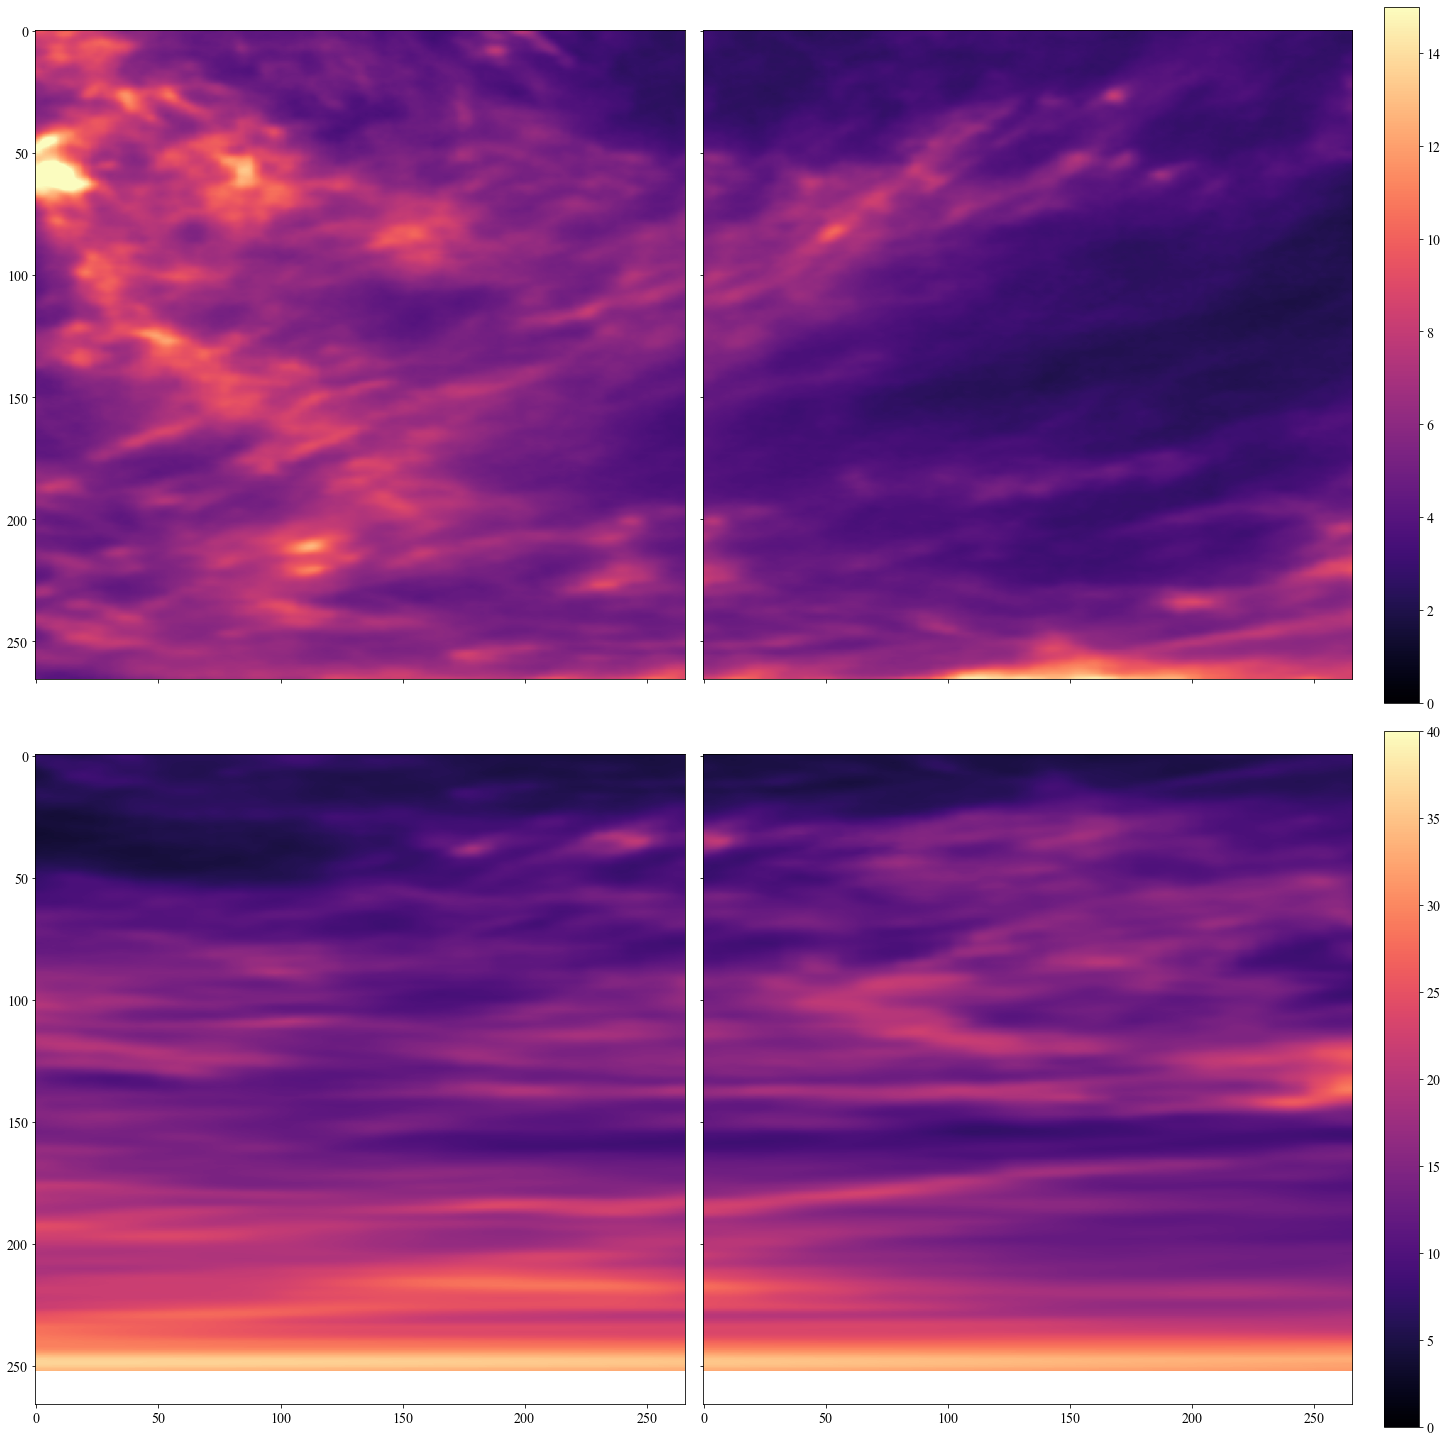

In [142]:
chan_map(v_indx_GASKAP(1.01 * 10 ** 2), v_indx_HI4PI(1.01 * 10 ** 2), 0.1, 0, 15, vmax_HI4PI_bot = 40)

# FROM MOSAICKED CUBE

In [8]:
mosaic_cube = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/SMC_HI4PI/mosaic_cube.fits')

In [9]:
def v_indx_HI4PI_mosaic(v_val): # v_val must be in m/s
    return int((v_val - -51220.42315311206) / (1288.21496912415))

In [13]:
# plots HI4PI mosaicked channel map alongside GASKAP-HI plot

def chan_map_mos(v_indx_GASKAP, v_indx_HI4PI, vmin_G, vmax_G, vmin_H, vmax_H, v, save = False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 40), constrained_layout = True)
    ax1.imshow(np.flip(GASKAP_file[0].data[v_indx_GASKAP,:,:], axis = 0), cmap = 'magma', vmin = vmin_G, vmax = vmax_G)
    ax2.imshow(np.flip(mosaic_cube[0].data[v_indx_HI4PI,:,:], axis = 0), cmap = 'magma', vmin = vmin_H, vmax = vmax_H)
    fig.suptitle(str(v) + ' km/s', y = 0.62, fontsize = 50)
    
    if save:
        plt.savefig('/Users/FRANNYPACK/Downloads/grind!/research/Images/Nick/SMC' + str(v_indx_GASKAP) + '.jpg', bbox_inches = 'tight')
    

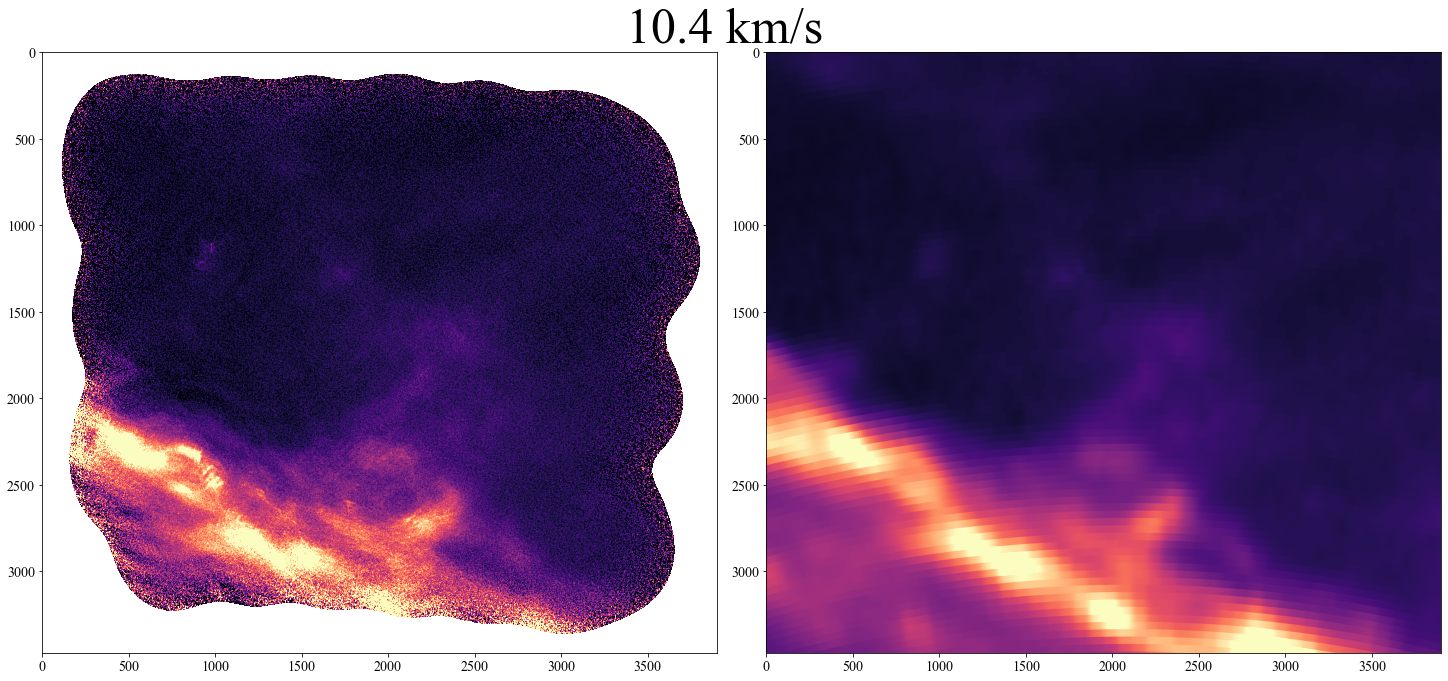

In [14]:
chan_map_mos(v_indx_GASKAP(10.4 * 10 ** 3), v_indx_HI4PI_mosaic(10.4 * 10 ** 3), 0, 15, 0, 15, 10.4, save = True)

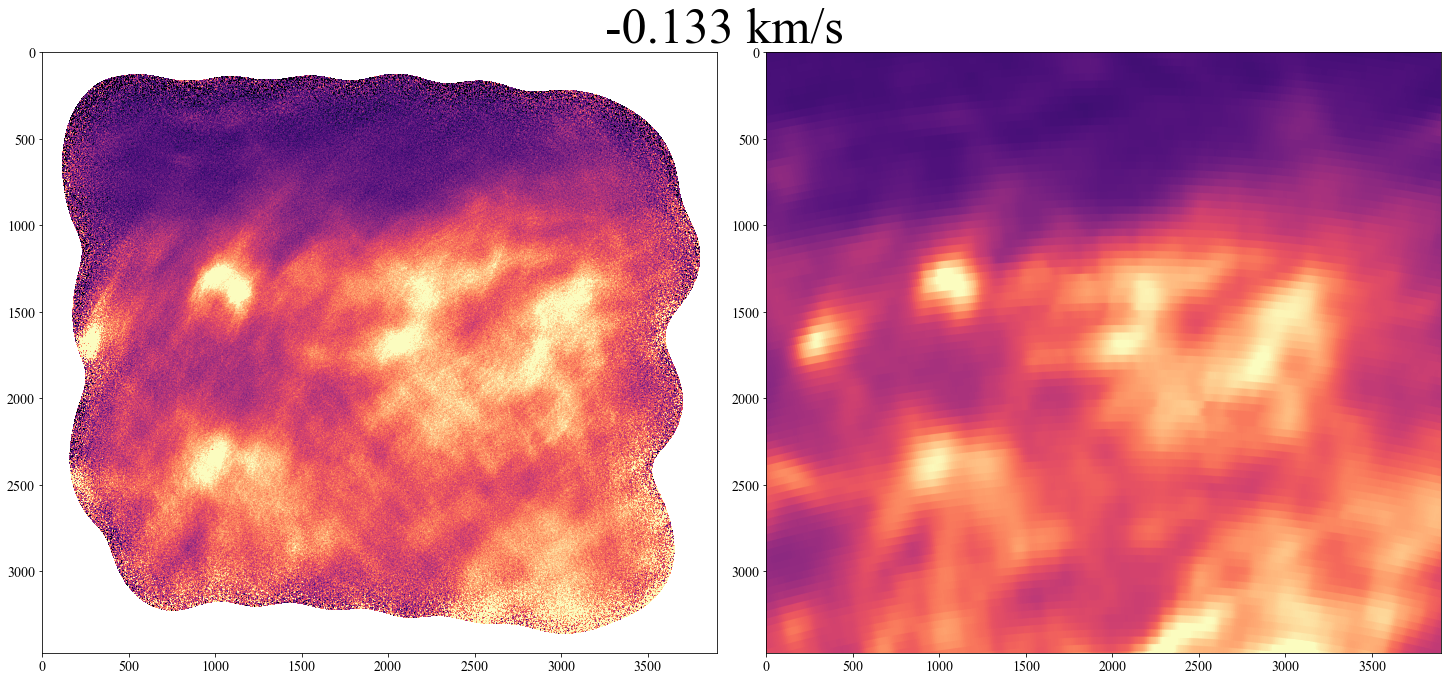

In [15]:
chan_map_mos(v_indx_GASKAP(-0.133 * 10 ** 3), v_indx_HI4PI_mosaic(-0.133 * 10 ** 3), 0, 20, 0, 20, -0.133, save = True)

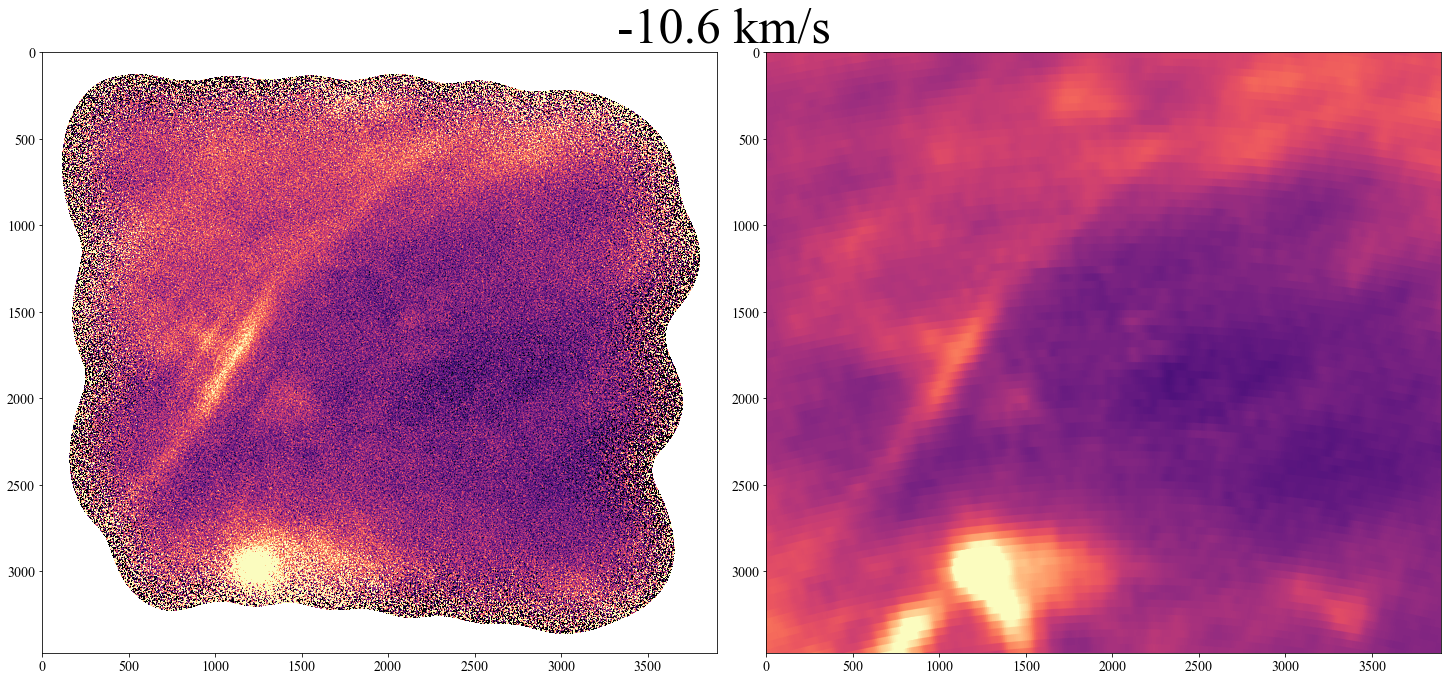

In [16]:
chan_map_mos(v_indx_GASKAP(-10.6 * 10 ** 3), v_indx_HI4PI_mosaic(-10.6 * 10 ** 3), 0, 5, 0, 5, -10.6, save = True)

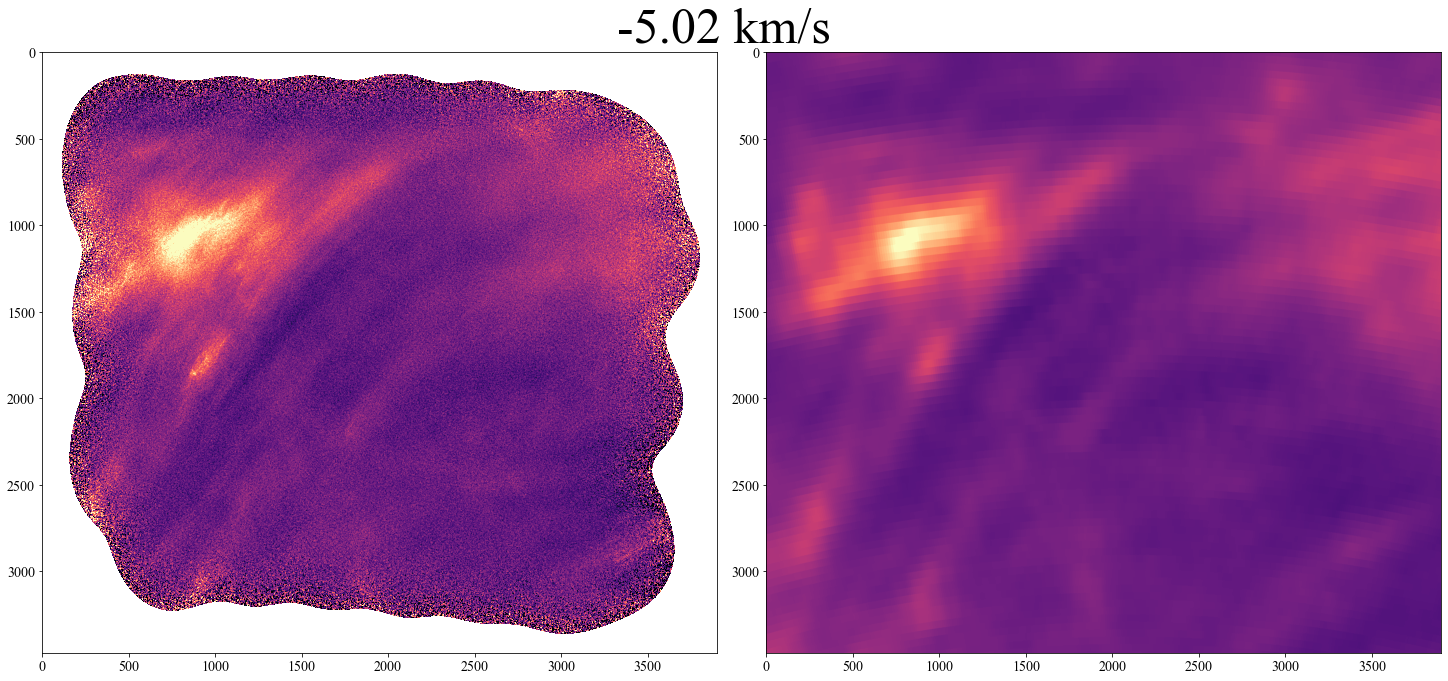

In [17]:
chan_map_mos(v_indx_GASKAP(-5.02 * 10 ** 3), v_indx_HI4PI_mosaic(-5.02 * 10 ** 3), 0, 15, 0, 15, -5.02, save = True)

# BRIGHTNESS TEMPERATURE AS A FUNCTION OF VELOCITY

Appear very similar!

In [168]:
sum_data_H = np.sum(np.sum(mosaic_cube[0].data, axis = 1), axis = 1)

Text(0.5, 1.0, 'HI4PI')

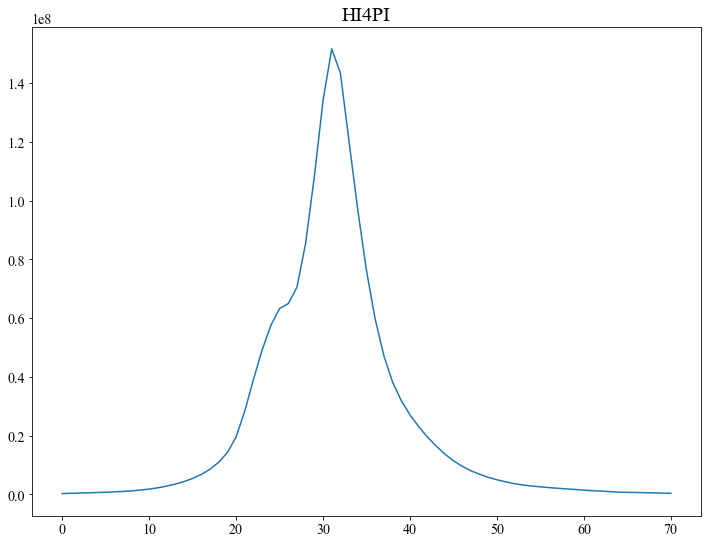

In [173]:
plt.plot(np.flip(sum_data_H)) # flipped b/c HI4PI velocity increases, whereas GASKAP decreases as go through cube
plt.title('HI4PI', fontsize = 20)

In [170]:
GASKAP_file[0].data[GASKAP_file[0].data == -32786] = np.nan
sum_data_G = np.nansum(np.nansum(GASKAP_file[0].data, axis = 1), axis = 1)

Text(0.5, 1.0, 'GASKAP')

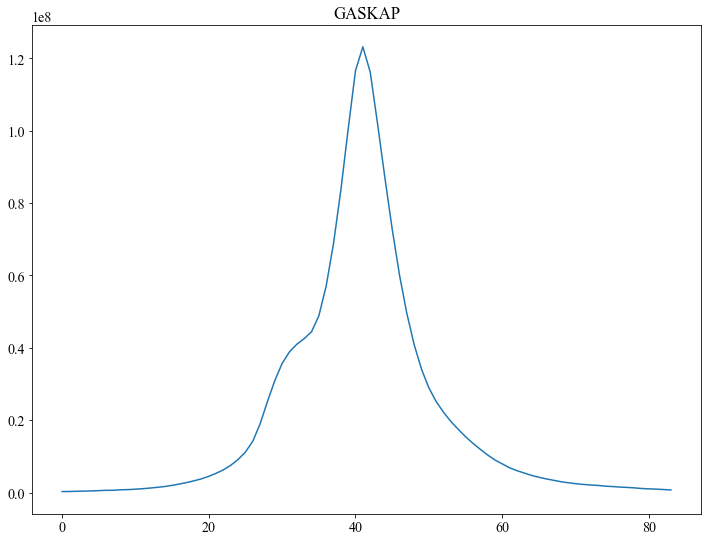

In [171]:
plt.plot(sum_data_G) 
plt.title('GASKAP')